# Решение антагонистической игры

In [41]:
def nash_equilibrium(A):
    from scipy.optimize import linprog
    b_1 = []
    b_2 = []
    z = []
    w = []
    p = []
    q = []
    Min = A[0][0]
    #Поиск минимума матрицы А
    for i in range(len(A)):
        for j in range(len(A[0])):
            if(Min > A[i][j]):
                Min = A[i][j]
    Min = abs(Min) + 1
    #Делаем матрицу положительной
    for i in range(len(A)):
        for j in range(len(A[0])):
            A[i][j] += Min
    #Подготовка столбцов ограничений для ЗЛП
    for i in range(len(A)):
        z.append(1.0)
        b_2.append(1.0)
    for i in range(len(A[0])):
        b_1.append(-1.0)
        w.append(-1.0)
    nash_i,nash_j,v = nash_equilibrium_point(A, Min)
    if(nash_i != 0):
        for i in range(len(A)):
            if(i == nash_i - 1):
                p.append(1.0)
            else:
                p.append(0.0)
        for i in range(len(A[0])):
            if(i == nash_j - 1):
                q.append(1.0)
            else:
                q.append(0.0)
        v = A[nash_i - 1][nash_j - 1] - Min
        return p,q,v
    #Поиск оптимального решения в смешанных стратегиях
    # Игрок 1
    res = linprog(w, A_ub = A, b_ub = b_2, options = {"disp": True})
    w = res.get("x")
    # Игрок 2
    for i in range(0, len(A), 1):
        for j in range(0, len(A[i]), 1):
            A[i][j] = (-1.0) * A[i][j]
    A_t = list(zip(*A))
    res = linprog(z, A_ub = A_t, b_ub = b_1, options = {"disp": True})
    z = res.get("x")
    #Расчет значения игры
    v = 0
    for i in range(len(z)):
        v += z[i]
    v = 1 / v
    for i in range(len(z)):
        p.append(z[i] * v)
    for i in range(len(w)):
        q.append(w[i] * v)
    v = v - Min
    print("p: ", p)
    print("q: ", q)
    print("v: ", v)
    return p, q, v

# Равновесие по Нэшу

In [42]:
def nash_equilibrium_point(A, Min):
    #Поиск равновесия по Нэшу
    import numpy as np
    max_nash = np.arange(len(A) * len(A[0])).reshape(len(A),len(A[0]))
    A_t = list(zip(*A))
    for i in range(len(A)):
        min_i = min(A[i])
        for j in range(len(A[i])):
            if(min_i == A[i][j]):
                max_nash[i][j] = 1
            else:
                max_nash[i][j] = 0
    max_nash = max_nash.transpose()
    for i in range(len(A_t)):
        max_j = max(A_t[i])
        for j in range(len(A_t[i])):
            if(max_j == A_t[i][j]):
                max_nash[i][j] += 1 
    max_nash = max_nash.transpose()
    sum = 0
    print ("Ситуации равновесия по Нэшу")
    for i in range(len(A)):
        for j in range(len(A[0])):
            if(max_nash[i][j] == 2):
                sum += 1
                nash_i = i + 1
                nash_j = j + 1
                print("Точка равновесия #", sum)
                print("v: ", A[i][j] - Min)
                print("Стратегия первого: ", i + 1)
                print("Стратегия второго: ", j + 1)
    if(sum == 0):
        print("-таких точек нет")
        return 0, 0, 0
    elif(sum == 1):
        return nash_i, nash_j, A[i][j] - Min
    else:
        print("Таких точек несколько")
        return 0, 0, 0

# Графики

In [43]:
def draw(p, q):
    import matplotlib.pyplot as plt
    x = max(len(p), len(q))
    y = max(max(p), max(q))
    fig1 = plt.xlim([0, x + x / 4])
    fig1 = plt.ylim([0, y + y / 4])
    for i in range(len(p)):
        scatter1 = plt.scatter(1.0 * i + 1, p[i], color = 'blue')
        graph1 = plt.plot([1.0 * i + 1, 1.0 * i + 1], [0.0, p[i]], color = 'blue') 
        grid1 = plt.grid(True)   # линии вспомогательной сетк
    plt.show()
    fig2 = plt.xlim([0, x + x / 4])
    fig2 = plt.ylim([0, y + y / 4])
    for i in range(len(q)):
        scatter2 = plt.scatter(1.0 * i + 1, q[i], color = 'blue')
        graph2 = plt.plot([1.0 * i + 1, 1.0 * i + 1], [0.0, q[i]], color = 'blue')
        grid2 = plt.grid(True)   # линии вспомогательной сетк
    plt.show()

# Полный спектор

Введите число строк в матрице А:
3
Введите матрицу А по строкам
1 3 3
2 1 2
2 3 1
Ситуации равновесия по Нэшу
-таких точек нет
Optimization terminated successfully.
         Current function value: -0.259259   
         Iterations: 3
Optimization terminated successfully.
         Current function value: 0.259259    
         Iterations: 3
p:  [0.14285714285714296, 0.57142857142857129, 0.28571428571428564]
q:  [0.5714285714285714, 0.14285714285714285, 0.2857142857142857]
v:  1.85714285714


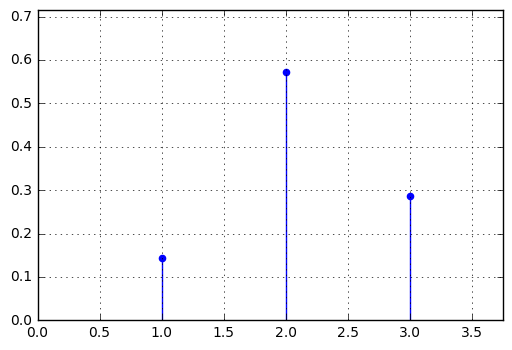

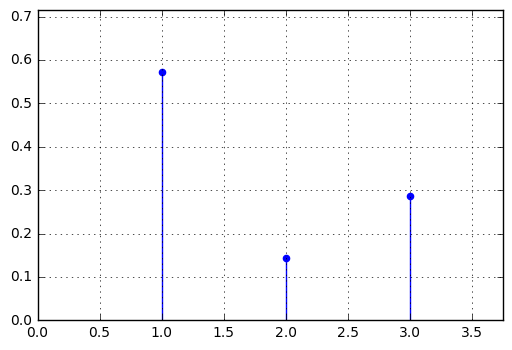

In [44]:
print("Введите число строк в матрице А:")
n = int(input())
A = []
print("Введите матрицу А по строкам")
for i in range(n):
    row = input().split()
    for i in range(len(row)):
        row[i] = float(row[i])
    A.append(row)
p,q,v = nash_equilibrium(A)
draw(p, q)

# Неполный спектор

Введите число строк в матрице А:
3
Введите матрицу А по строкам
3 1 5
1 3 3
2 2 1
Ситуации равновесия по Нэшу
-таких точек нет
Optimization terminated successfully.
         Current function value: -0.250000   
         Iterations: 2
Optimization terminated successfully.
         Current function value: 0.250000    
         Iterations: 3
p:  [0.16666666666666671, 0.16666666666666649, 0.66666666666666674]
q:  [0.50000000000000011, 0.49999999999999989, 0.0]
v:  2.0


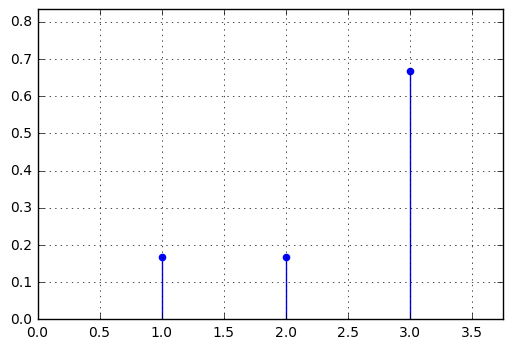

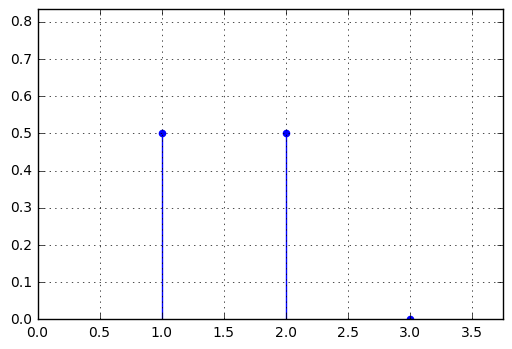

In [45]:
print("Введите число строк в матрице А:")
n = int(input())
A = []
print("Введите матрицу А по строкам")
for i in range(n):
    row = input().split()
    for i in range(len(row)):
        row[i] = float(row[i])
    A.append(row)
p,q,v = nash_equilibrium(A)
draw(p, q)

# Полный спектор

Введите число строк в матрице А:
3
Введите матрицу А по строкам
2 0 1
1 2 0
0 1 2
Ситуации равновесия по Нэшу
-таких точек нет
Optimization terminated successfully.
         Current function value: -0.500000   
         Iterations: 3
Optimization terminated successfully.
         Current function value: 0.500000    
         Iterations: 3
p:  [0.33333333333333337, 0.33333333333333331, 0.33333333333333337]
q:  [0.33333333333333337, 0.33333333333333337, 0.33333333333333331]
v:  1.0


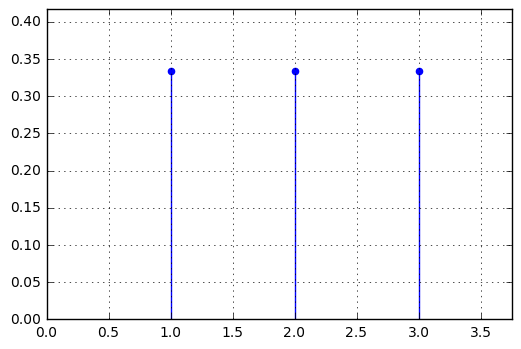

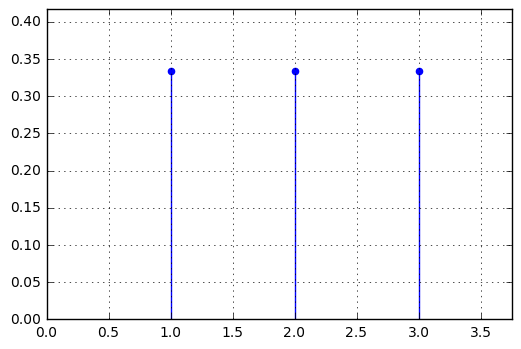

In [46]:
print("Введите число строк в матрице А:")
n = int(input())
A = []
print("Введите матрицу А по строкам")
for i in range(n):
    row = input().split()
    for i in range(len(row)):
        row[i] = float(row[i])
    A.append(row)
p,q,v = nash_equilibrium(A)
draw(p, q)

# 1 точка равновесия по Нэшу

Введите число строк в матрице А:
4
Введите матрицу А по строкам
1 2 3 -4 5 6
5 -1 2 -3 -2 4
2 1 3 1 2 1
-1 2 1 1 2 4
Ситуации равновесия по Нэшу
Точка равновесия # 1
v:  1.0
Стратегия первого:  3
Стратегия второго:  4


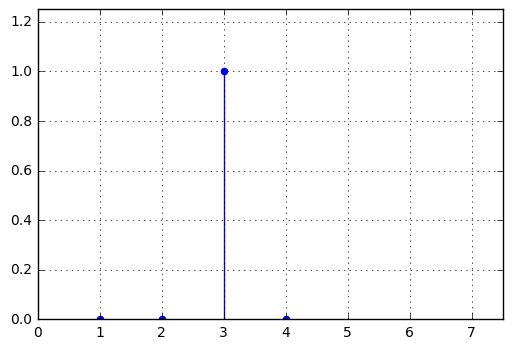

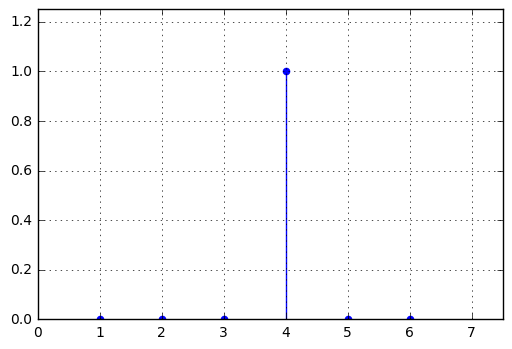

In [47]:
print("Введите число строк в матрице А:")
n = int(input())
A = []
print("Введите матрицу А по строкам")
for i in range(n):
    row = input().split()
    for i in range(len(row)):
        row[i] = float(row[i])
    A.append(row)
p,q,v = nash_equilibrium(A)
draw(p, q)

# Несколько точек равновесия по Нэшу

Введите число строк в матрице А:
2
Введите матрицу А по строкам
2 1 1
2 1 2
Ситуации равновесия по Нэшу
Точка равновесия # 1
v:  1.0
Стратегия первого:  1
Стратегия второго:  2
Точка равновесия # 2
v:  1.0
Стратегия первого:  2
Стратегия второго:  2
Таких точек несколько
Optimization terminated successfully.
         Current function value: -0.333333   
         Iterations: 2
Optimization terminated successfully.
         Current function value: 0.333333    
         Iterations: 4
p:  [1.0, 0.0]
q:  [0.0, 1.0, 0.0]
v:  1.0


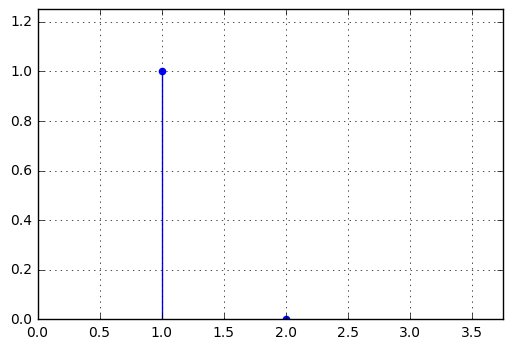

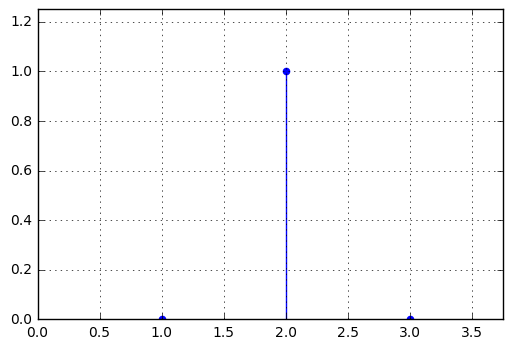

In [48]:
print("Введите число строк в матрице А:")
n = int(input())
A = []
print("Введите матрицу А по строкам")
for i in range(n):
    row = input().split()
    for i in range(len(row)):
        row[i] = float(row[i])
    A.append(row)
p,q,v = nash_equilibrium(A)
draw(p, q)